In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
#Load the Dataset
bank=("D:/Assignments Excel R/assignment 6/bank-full.csv")
bank=pd.read_csv(bank,sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank=bank[['y','age','job','education','default','balance','housing','loan','marital','day','month','duration','campaign','pdays','previous','poutcome','contact']]

In [5]:
bank

,y,age,job,education,default,balance,housing,loan,marital,day,month,duration,campaign,pdays,previous,poutcome,contact
0,no,58,management,tertiary,no,2143,yes,no,married,5,may,261,1,-1,0,unknown,unknown
1,no,44,technician,secondary,no,29,yes,no,single,5,may,151,1,-1,0,unknown,unknown
2,no,33,entrepreneur,secondary,no,2,yes,yes,married,5,may,76,1,-1,0,unknown,unknown
3,no,47,blue-collar,unknown,no,1506,yes,no,married,5,may,92,1,-1,0,unknown,unknown
4,no,33,unknown,unknown,no,1,no,no,single,5,may,198,1,-1,0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,technician,tertiary,no,825,no,no,married,17,nov,977,3,-1,0,unknown,cellular
45207,yes,71,retired,primary,no,1729,no,no,divorced,17,nov,456,2,-1,0,unknown,cellular
45208,yes,72,retired,secondary,no,5715,no,no,married,17,nov,1127,5,184,3,success,cellular
45209,no,57,blue-collar,secondary,no,668,no,no,married,17,nov,508,4,-1,0,unknown,telephone


In [6]:
bank['y']=bank['y'].map({'yes':1 , 'no':0})

In [8]:
bank['default']=bank['default'].map({'yes':1 , 'no':0})

In [9]:
bank['housing']=bank['housing'].map({'yes':1 , 'no':0})

In [7]:
bank['loan']=bank['loan'].map({'yes':1 , 'no':0})

In [10]:
bank

,y,age,job,education,default,balance,housing,loan,marital,day,month,duration,campaign,pdays,previous,poutcome,contact
0,0,58,management,tertiary,0,2143,1,0,married,5,may,261,1,-1,0,unknown,unknown
1,0,44,technician,secondary,0,29,1,0,single,5,may,151,1,-1,0,unknown,unknown
2,0,33,entrepreneur,secondary,0,2,1,1,married,5,may,76,1,-1,0,unknown,unknown
3,0,47,blue-collar,unknown,0,1506,1,0,married,5,may,92,1,-1,0,unknown,unknown
4,0,33,unknown,unknown,0,1,0,0,single,5,may,198,1,-1,0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,technician,tertiary,0,825,0,0,married,17,nov,977,3,-1,0,unknown,cellular
45207,1,71,retired,primary,0,1729,0,0,divorced,17,nov,456,2,-1,0,unknown,cellular
45208,1,72,retired,secondary,0,5715,0,0,married,17,nov,1127,5,184,3,success,cellular
45209,0,57,blue-collar,secondary,0,668,0,0,married,17,nov,508,4,-1,0,unknown,telephone


In [34]:
bank1=bank.copy()

In [35]:
bank1

,y,age,job,education,default,balance,housing,loan,marital,day,month,duration,campaign,pdays,previous,poutcome,contact
0,0,58,management,tertiary,0,2143,1,0,married,5,may,261,1,-1,0,unknown,unknown
1,0,44,technician,secondary,0,29,1,0,single,5,may,151,1,-1,0,unknown,unknown
2,0,33,entrepreneur,secondary,0,2,1,1,married,5,may,76,1,-1,0,unknown,unknown
3,0,47,blue-collar,unknown,0,1506,1,0,married,5,may,92,1,-1,0,unknown,unknown
4,0,33,unknown,unknown,0,1,0,0,single,5,may,198,1,-1,0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,technician,tertiary,0,825,0,0,married,17,nov,977,3,-1,0,unknown,cellular
45207,1,71,retired,primary,0,1729,0,0,divorced,17,nov,456,2,-1,0,unknown,cellular
45208,1,72,retired,secondary,0,5715,0,0,married,17,nov,1127,5,184,3,success,cellular
45209,0,57,blue-collar,secondary,0,668,0,0,married,17,nov,508,4,-1,0,unknown,telephone


In [36]:
bank1= bank1.drop('job', axis=1)
bank1 =bank1.drop('education', axis=1)
bank1 =bank1.drop('marital', axis=1)
bank1 =bank1.drop('month', axis=1)       
bank1 =bank1.drop('contact', axis=1)       
bank1 =bank1.drop('poutcome', axis=1)       

In [37]:
bank1

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,0,58,0,2143,1,0,5,261,1,-1,0
1,0,44,0,29,1,0,5,151,1,-1,0
2,0,33,0,2,1,1,5,76,1,-1,0
3,0,47,0,1506,1,0,5,92,1,-1,0
4,0,33,0,1,0,0,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,0,825,0,0,17,977,3,-1,0
45207,1,71,0,1729,0,0,17,456,2,-1,0
45208,1,72,0,5715,0,0,17,1127,5,184,3
45209,0,57,0,668,0,0,17,508,4,-1,0


In [38]:
bank1

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,0,58,0,2143,1,0,5,261,1,-1,0
1,0,44,0,29,1,0,5,151,1,-1,0
2,0,33,0,2,1,1,5,76,1,-1,0
3,0,47,0,1506,1,0,5,92,1,-1,0
4,0,33,0,1,0,0,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,0,825,0,0,17,977,3,-1,0
45207,1,71,0,1729,0,0,17,456,2,-1,0
45208,1,72,0,5715,0,0,17,1127,5,184,3
45209,0,57,0,668,0,0,17,508,4,-1,0


In [39]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   y         45211 non-null  int64
 1   age       45211 non-null  int64
 2   default   45211 non-null  int64
 3   balance   45211 non-null  int64
 4   housing   45211 non-null  int64
 5   loan      45211 non-null  int64
 6   day       45211 non-null  int64
 7   duration  45211 non-null  int64
 8   campaign  45211 non-null  int64
 9   pdays     45211 non-null  int64
 10  previous  45211 non-null  int64
dtypes: int64(11)
memory usage: 3.8 MB


In [40]:
bank1.shape

(45211, 11)

In [42]:
bank1=bank1.dropna()
bank1.shape

(45211, 11)

In [49]:
bank1[bank1.duplicated()]

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
25793,0,57,0,0,0,0,19,97,1,-1,0


In [51]:
bank1.isna().sum()

y           0
age         0
default     0
balance     0
housing     0
loan        0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [56]:
# Dividing our data into input and output variables
X=bank1.iloc[:,1:]
Y=bank1.iloc[:,0]

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [72]:
#Predict for X dataset
y_pred =classifier.predict(X)

In [69]:
y_pred_df=pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [73]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [76]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39212   710]
 [ 4318   971]]


In [77]:
((39219+980)/(39219+703+4309+980))*100  # accuracy 89% it was correctly pridicted 

88.91420229590143

In [78]:
#Classification report 
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))              #Note- Dataset is unbalanced

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.18      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [79]:
classifier.predict_proba(X)

array([[0.93293649, 0.06706351],
       [0.9344086 , 0.0655914 ],
       [0.94552515, 0.05447485],
       ...,
       [0.59453044, 0.40546956],
       [0.90530323, 0.09469677],
       [0.80686208, 0.19313792]])

In [80]:
#ROC Curve

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0, 0.5, 'Tru Positive Rate')

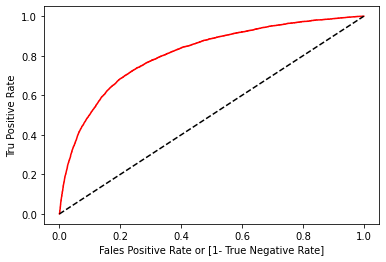

In [83]:
fpr,tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc =roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='red', label='logit model (area =%0.2f )'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('Fales Positive Rate or [1- True Negative Rate]')
plt.ylabel('Tru Positive Rate')